# FE621 Final Exam

Student: Yuxuan Xia

Supervisor: Ionut Florescu

Date: Aug/12/2018

Platform: Quantopian

Notice: Due to the fact that we cannot query stock prices easily from the local environment (PC), I decided to use quantopian notebook to address this problem as it has a robust python environment as well as a whole bunch of data available for downloading.

## Problem B. Principal Component Analysis.

### 1. Download daily prices for the components of DJIA for the last 5 years. Construct the corresponding matrix of standardized returns.

In this part, we use the built-in filter Q500US to substitute the components of DJIA.

Here is the statement from Quantopian:

"We don't have a data source that provides those specific indices. They are actually **incredibly expensive** to buy - Dow Jones, S&P, Russel, etc. make a boatload of money charging to use the constituents. We provide some smart alternatives that are better for quant trading purposes. Check out the Q500US, Q1500US, and Q3000US."

And this answers why replicate DJIA is such a profitable thing.

In [1]:
from quantopian.research import run_pipeline


# from quantopian.pipeline import Pipeline
# from quantopian.pipeline.data import morningstar, USEquityPricing
# from quantopian.pipeline.factors import Latest, CustomFactor, SimpleMovingAverage, AverageDollarVolume, Returns, RSI
# from quantopian.pipeline.classifiers.morningstar import Sector
# from quantopian.pipeline.filters import Q500US, Q1500US, QTradableStocksUS

from quantopian.pipeline import data,Pipeline
from quantopian.pipeline import filters
from quantopian.pipeline import factors
from quantopian.pipeline import classifiers



import pandas as pd
import seaborn as sns; sns.set()

import numpy as np
import scipy as sp
from time import time

import alphalens as al
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# from Ipython import display
from sklearn import linear_model, decomposition, ensemble, preprocessing, isotonic, metrics


In [2]:
from quantopian.research import local_csv

In [3]:
components_df = local_csv("DJIA_components.csv")
components_df.head()

,﻿Symbol,Company Name,Last Price,Change,% Change,Volume
0,PG,The Procter & Gamble Company,81.47,0.04,0.05%,"3,025,104"
1,INTC,Intel Corporation,48.82,-0.03,-0.06%,"9,156,081"
2,DIS,The Walt Disney Company,112.61,-0.07,-0.06%,"3,615,567"
3,BA,The Boeing Company,339.15,-0.26,-0.08%,"1,237,816"
4,CAT,Caterpillar Inc.,135.68,-0.24,-0.18%,"2,514,744"


In [4]:
components_list = components_df.iloc[:,0].values[:]

In [5]:
from quantopian.research import returns

In [6]:
start = pd.Timestamp("2013-05-01")
end = pd.Timestamp("2018-05-01")

In [7]:
returns_df = returns(components_list,start,end)
returns_df.shape

(1260, 30)

In [8]:
returns_df = returns_df.fillna(returns_df.mean(axis=0))

In [9]:
returns_df.head()

,Equity(5938 [PG]),Equity(3951 [INTC]),Equity(2190 [DIS]),Equity(698 [BA]),Equity(1267 [CAT]),Equity(4151 [JNJ]),Equity(5923 [PFE]),Equity(21839 [VZ]),Equity(8089 [WBA]),Equity(23112 [CVX]),...,Equity(7792 [UNH]),Equity(7883 [UTX]),Equity(8347 [XOM]),Equity(20088 [GS]),Equity(4922 [MMM]),Equity(3766 [IBM]),Equity(25006 [JPM]),Equity(5029 [MRK]),Equity(24 [AAPL]),Equity(51157 [DWDP])
2013-05-01 00:00:00+00:00,0.003129,0.001660,0.004766,-0.002075,-0.018902,-0.011621,-0.005501,-0.028217,-0.011114,-0.012069,...,-0.003669,-0.001749,-0.014194,-0.023320,-0.001434,-0.013774,-0.019804,-0.028073,-0.007590,-0.000008
2013-05-02 00:00:00+00:00,0.009739,0.005020,0.011553,0.010744,0.014449,0.011171,0.012384,0.002494,-0.001622,0.013551,...,-0.004028,0.007242,0.012230,0.006558,0.014375,0.013217,0.001873,0.000437,0.013961,-0.000008
2013-05-03 00:00:00+00:00,0.005667,0.002910,0.014402,0.016912,0.032638,0.007163,-0.010561,0.002655,-0.017800,0.011724,...,-0.009254,0.015163,0.016021,0.011913,0.016375,0.009833,-0.010391,-0.001310,0.009797,-0.000008
2013-05-06 00:00:00+00:00,-0.005500,-0.002273,0.004160,0.004809,0.006789,-0.012362,-0.008077,-0.011951,-0.003124,-0.001627,...,0.021897,0.004078,0.006444,0.021890,0.000838,-0.007780,0.012389,-0.014686,0.024093,-0.000008
2013-05-07 00:00:00+00:00,0.002441,0.010420,0.015306,0.006365,0.024997,0.009560,0.011300,0.016707,0.027995,-0.001541,...,0.004660,0.003953,0.005856,0.005796,0.001204,0.003454,0.019916,0.006004,-0.004595,-0.000008


In [10]:
return_matrix = returns_df.values.T # (n_assets, n_days)
return_matrix.shape

(30, 1260)

In [11]:
return_mean = return_matrix.mean(axis=1)
return_std = return_matrix.std(axis=1)

In [12]:
return_zscore = (return_matrix - return_mean[:,np.newaxis])/return_std[:,np.newaxis]

In [13]:
return_zscore

array([[  3.43535718e-01,   1.09626922e+00,   6.32478105e-01, ...,
          9.67363210e-02,  -7.79108617e-01,  -6.58346545e-01],
       [  5.48332176e-02,   2.86505086e-01,   1.41004563e-01, ...,
         -4.62481494e-01,  -1.51063669e+00,   2.21046811e+00],
       [  3.65467980e-01,   9.45726016e-01,   1.18928711e+00, ...,
         -5.81434635e-01,   9.31784361e-01,  -3.23138840e-01],
       ..., 
       [ -2.33864021e+00,   5.72876952e-03,  -1.37914842e-01, ...,
          3.90009959e-02,  -8.18352476e-01,  -1.34254261e+00],
       [ -5.90974896e-01,   8.97976392e-01,   6.10342224e-01, ...,
         -8.61702700e-01,   1.18048021e+00,   1.49700269e+00],
       [ -1.55625436e-19,  -1.55625436e-19,  -1.55625436e-19, ...,
          7.44228324e-01,  -3.05225403e+00,  -6.08620890e-01]])

### 2. Calculate the sample correlation matrix

In [14]:
n_assets,n_days = return_zscore.shape

In [15]:
n_assets

30

In [16]:
n_days

1260

In [17]:
correlation_matrix = 1/n_days * np.dot(return_zscore,return_zscore.T)

In [18]:
return_corr = np.dot(return_zscore,return_zscore.T)/n_days # our calculation

In [19]:
return_pearson = np.corrcoef(return_zscore) # Pearson's correlation coefficients from numpy library

In [20]:
return_corr

array([[ 1.        ,  0.31651063,  0.34586084,  0.32744702,  0.26611145,
         0.48806812,  0.351679  ,  0.38917167,  0.30445375,  0.36184289,
         0.38448321,  0.57556357,  0.35145663,  0.38805311,  0.35939783,
         0.31597283,  0.29446122,  0.43464852,  0.37044373,  0.27587018,
         0.30131465,  0.3570394 ,  0.39275277,  0.30269319,  0.42965042,
         0.33259687,  0.31365427,  0.3344719 ,  0.26678955,  0.17959299],
       [ 0.31651063,  1.        ,  0.37164166,  0.36233481,  0.38965603,
         0.35826017,  0.34300929,  0.31761936,  0.25674025,  0.36440369,
         0.30666765,  0.310466  ,  0.37354248,  0.23531045,  0.51762388,
         0.48149235,  0.27267515,  0.36179328,  0.39445492,  0.3531561 ,
         0.30556945,  0.39742359,  0.3785358 ,  0.42148057,  0.45777421,
         0.4031579 ,  0.42345356,  0.29867029,  0.36177763,  0.25273558],
       [ 0.34586084,  0.37164166,  1.        ,  0.42182501,  0.34194208,
         0.38052498,  0.3696546 ,  0.35670697,  0

In [21]:
return_pearson

array([[ 1.        ,  0.31651063,  0.34586084,  0.32744702,  0.26611145,
         0.48806812,  0.351679  ,  0.38917167,  0.30445375,  0.36184289,
         0.38448321,  0.57556357,  0.35145663,  0.38805311,  0.35939783,
         0.31597283,  0.29446122,  0.43464852,  0.37044373,  0.27587018,
         0.30131465,  0.3570394 ,  0.39275277,  0.30269319,  0.42965042,
         0.33259687,  0.31365427,  0.3344719 ,  0.26678955,  0.17959299],
       [ 0.31651063,  1.        ,  0.37164166,  0.36233481,  0.38965603,
         0.35826017,  0.34300929,  0.31761936,  0.25674025,  0.36440369,
         0.30666765,  0.310466  ,  0.37354248,  0.23531045,  0.51762388,
         0.48149235,  0.27267515,  0.36179328,  0.39445492,  0.3531561 ,
         0.30556945,  0.39742359,  0.3785358 ,  0.42148057,  0.45777421,
         0.4031579 ,  0.42345356,  0.29867029,  0.36177763,  0.25273558],
       [ 0.34586084,  0.37164166,  1.        ,  0.42182501,  0.34194208,
         0.38052498,  0.3696546 ,  0.35670697,  0

The sanity check validate our computation

### 3. Calculate the eigenvalues and eigenvectors of the matrix Cij and graph the eigenvalues $\lambda_1 > \lambda_2 > \cdots$. What percent of the trace is explained by summing the first 5 eigenvalues?

In [22]:
eigenvalues,eigenvectors = np.linalg.eig(return_corr)

Check the sum of trace equal to n_assets

In [23]:
np.abs(eigenvalues.sum()-30)<1e-6

True

In [24]:
variance_explained = eigenvalues[:5].sum()/eigenvalues.sum()

In [25]:
print("variance explained by the first 5 components: {}".format(variance_explained))

variance explained by the first 5 components: 0.549830564097


### 4. Calculate the sample mean and sample standard deviation of the factor F

In [26]:
allocation = eigenvectors[0]/return_std/np.sqrt(eigenvalues[0])

In [27]:
factor_F = np.dot(allocation,return_matrix)

In [28]:
factor_F

array([ 0.30896123, -0.17995745,  0.16354552, ..., -0.00240359,
       -0.24592785,  0.2000278 ])

In [29]:
factor_F.mean()

0.012690239585865702

In [30]:
factor_F.std()

0.26953743954344622

### 5. Consider a series of daily returns of the DIA ETF for the same time period. Perform a linear regression of the returns of F with the standardized returns of DIA. Calculate the R-squared of the regression and discuss whether F and the capitalization-weighted market portfolio are good proxies for each other. Discuss the result and argue why F and the particular market index might be related.

#### linear regression

In [31]:
from quantopian.research import returns,prices

In [32]:
DIA_return_slice = returns("DIA",start,end) # spider DIA
DIA_price_slice = prices("DIA",start,end)

In [33]:
DIA_return_array = DIA_return_slice.values
DIA_price_array = DIA_price_slice.values

In [34]:
DIA_return_array.shape,factor_F.shape

((1260,), (1260,))

In [35]:
from sklearn import linear_model
from sklearn import metrics

In [36]:
lr = linear_model.LinearRegression()

In [37]:
lr.fit(X=factor_F[:,np.newaxis],y=DIA_return_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
DIA_return_predict = lr.predict(X=factor_F[:,np.newaxis])

#### R2

In [39]:
metrics.r2_score(y_pred=DIA_return_predict,y_true=DIA_return_array)

0.33059296345675937

#### Visulization

In [40]:
import matplotlib.pyplot as plt

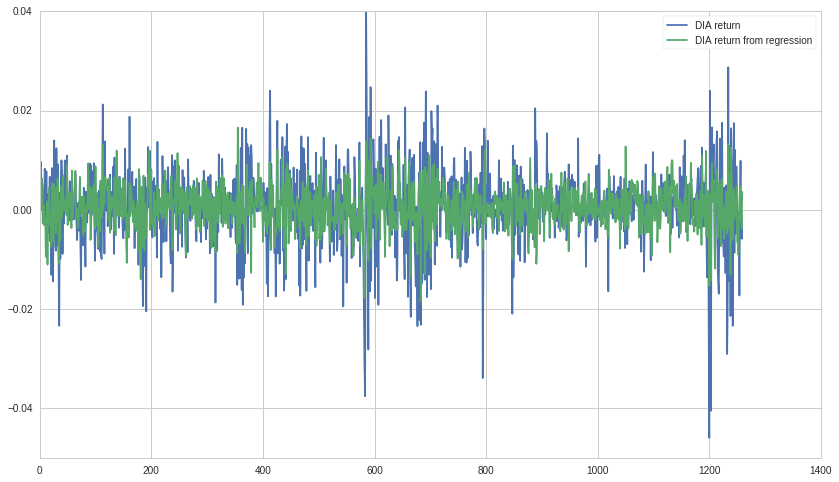

In [41]:
plt.plot(DIA_return_array)
plt.plot(DIA_return_predict)
plt.legend(["DIA return","DIA return from regression"])

#### Variance explained by the main component

In [42]:
eigenvalues[0]/eigenvalues.sum()

0.38706301384096137

Theoretically, if DIA is constructed by exactly the 30 assets we used, and never change its component list as well as its allocation, the variance explained using factor F should be 30.6%. And R2 should be much higher than what we computed. However, all the assumptions collapse since the components of DJIA is dynamic as well as DIA.

Even though, DIA as a DJIA ETF successfully shows its validity by a good R2 score to the main component of DJIA components. This is due to the fact that DIA is constructed to mimic DJIA, and the main component explained 38.7% variance of DJIA, so DIA should be related to this main component.

### 6. Consider the 5 eigenportfolios (factors) corresponding to the top 5 eigenvalues in the PCA conducted previously. That is, each of the 5 factors are constructed in a similar way with the construction in part4. Let $F_{kt}$ denote the daily return of the eigenportfolio k on date t. For each of the 30 equity in the DJIA do the following:

In [43]:
eigenvalues[:5].sum()/eigenvalues.sum()

0.54983056409691755

#### factor F matrix

In [44]:
allocations = []
allocations[:] = [eigenvectors[i]/return_std/np.sqrt(eigenvalues[i]) for i in range(5)]

In [45]:
allocations = np.array(allocations)
factor_F_matrix = np.dot(allocations,return_matrix)

In [46]:
factor_F_matrix = factor_F_matrix.T # [n_samples, n_features]
factor_F_matrix.shape

(1260, 5)

#### cross-sectional zscore of returns

In [47]:
mus = return_matrix.mean(axis=1)
sigmas = return_matrix.std(axis=1)

return_zscore = (return_matrix-mus[:,np.newaxis])/sigmas[:,np.newaxis]

In [49]:
return_zscore = return_zscore.T # [n_samples, n_targets]
return_zscore.shape

(1260, 30)

#### linear regression without fitting the intercept

In [50]:
lr = linear_model.LinearRegression(fit_intercept=False)
lr.fit(X=factor_F_matrix, y=return_zscore)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [57]:
beta_matrix = lr.coef_ # beta in problem
beta_matrix

array([[ 1.56985572,  0.25368053,  0.3925496 ,  0.08232734,  0.44158824],
       [ 1.36109333, -0.28945669, -0.06468587, -0.35824321, -0.2301076 ],
       [ 1.19878756,  0.01891622,  0.07692076, -0.21622567,  0.32766502],
       [ 1.10182079,  0.24588231,  0.19445316, -0.2469598 ,  0.22058351],
       [ 0.35246397,  0.22485324,  0.02582279, -0.50181785,  0.06194982],
       [ 0.56029829, -0.23009169,  0.34339788, -0.12557866,  0.2150055 ],
       [ 0.20677281, -0.24907175,  0.26370521, -0.14449374,  0.23408149],
       [ 0.57931571, -0.0123194 ,  0.07469673, -0.19860754,  0.27708611],
       [ 0.62265921,  0.06558351,  0.16660004, -0.20220961, -0.01075293],
       [ 0.7898533 ,  0.01671887,  0.00472377, -0.20123155,  0.30643163],
       [ 0.03398733,  0.19830815,  0.26069007, -0.47882555,  0.01413778],
       [ 1.43970523,  0.12030461,  0.30543673,  0.00189531,  0.22592013],
       [-0.13063955,  0.05399763,  0.25594416, -0.30789539,  0.39091451],
       [ 1.09613329,  0.10957761,  0.0

In [58]:
lr.intercept_

0.0

#### r2 score

In [59]:
lr.score(X=factor_F_matrix, y=return_zscore)

0.42016451976274194

In [60]:
metrics.r2_score(y_true=return_zscore,y_pred=lr.predict(factor_F_matrix)) # sanity check

0.42016451976274194

#### Monte Carlo

In [61]:
mus.shape,sigmas.shape,beta_matrix.shape

((30,), (30,), (30, 5))

In [62]:
n_trials = 100000

In [63]:
Fki = sp.stats.t(df=3.5).rvs((5,n_trials))
Gsi = sp.stats.t(df=3.5).rvs((n_assets,n_trials))

The following expression under the square root operator is not always positive:
$$1- \sum_{k=1}^5 \beta_{sk}^2$$
To make this model valid, one can use absolute value of the above expression

In [64]:
(1-(beta_matrix**2).sum(axis=1))

array([-1.88467394, -1.1218322 , -0.59748415, -0.42192542,  0.56888441,
        0.45320417,  0.74999525,  0.54244028,  0.53923439,  0.24143545,
        0.66208564, -1.23155943,  0.66689643, -0.34955281,  0.29101942,
        0.69224814, -0.47939487, -0.78682352,  0.72003443,  0.42787298,
        0.1337009 , -0.09167788,  0.1342136 ,  0.61335293,  0.57708272,
        0.56881257,  0.65230693,  0.25015683, -2.37530021,  0.84539742])

In [65]:
Rsi = mus[:,np.newaxis] + sigmas[:,np.newaxis]*np.dot(beta_matrix,Fki) + sigmas[:,np.newaxis]*\
    np.sqrt(np.abs(1-(beta_matrix**2).sum(axis=1)))[:,np.newaxis]*Gsi

In [66]:
Ris = Rsi.T

In [67]:
Ris[0]

array([-0.03273784, -0.03039759, -0.02801586, -0.02722335, -0.0038028 ,
       -0.01867527, -0.01293161, -0.00471716, -0.01916345, -0.00344741,
        0.00130724, -0.0183349 , -0.00042342, -0.02335875, -0.040015  ,
       -0.0209574 , -0.01777809, -0.03227339, -0.00805495, -0.03082729,
       -0.0327339 , -0.01984014, -0.02129233, -0.01396883, -0.0168634 ,
       -0.03193198, -0.01277147,  0.00867572, -0.05525569, -0.00304265])

In [68]:
def calculate_return_tensor(n_trials,n_days):
    R_tensor = list() # [n_days,n_trials,n_assets]
    for i in range(n_days):
        Fki = sp.stats.t(df=3.5).rvs((5,n_trials))
        Gsi = sp.stats.t(df=3.5).rvs((n_assets,n_trials))
        Rsi = mus[:,np.newaxis] + sigmas[:,np.newaxis]*np.dot(beta_matrix,Fki) + sigmas[:,np.newaxis]*\
            np.sqrt(np.abs(1-(beta_matrix**2).sum(axis=1)))[:,np.newaxis]*Gsi
        Ris = Rsi.T # [n_trials, n_assets]
        R_tensor.append(Ris)
    R_tensor = np.array(R_tensor)
    return R_tensor

In [69]:
return_tensor = calculate_return_tensor(n_trials=10000,n_days=10)

In [70]:
return_tensor.shape

(10, 10000, 30)

#### 10 days return

In [71]:
return_matrix_10d = (return_tensor+1).prod(axis=0)-1

In [72]:
return_matrix_10d.shape # [n_samples, n_assets]

(10000, 30)

#### 10 days return for the portfolio equally weighted in its components

In [73]:
return_array_10d = return_matrix_10d.mean(axis=1)

#### QQ plot corresponding to a fitted student-t distribution

In [74]:
import statsmodels.api as sm

In [75]:
df, loc, scale = sp.stats.t.fit(return_array_10d)

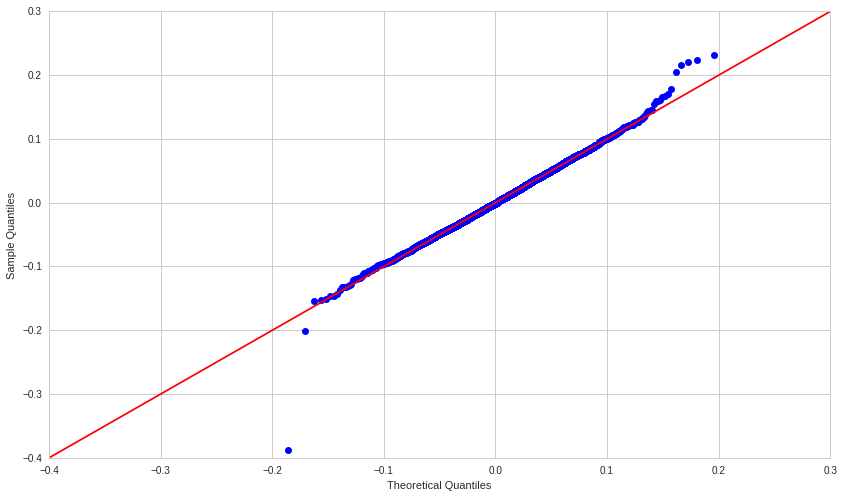

In [76]:
sm.qqplot(return_array_10d, sp.stats.t,distargs=(df,),loc=loc,scale=scale,line='45')
plt.show()

From the fitted qq plot, we find that the return distribution is still a student-t distribution

#### distribution plot

In [77]:
import seaborn as sns

In [78]:
df,loc,scale

(11.672261241179042, 0.0049268710816779207, 0.035950094483224407)

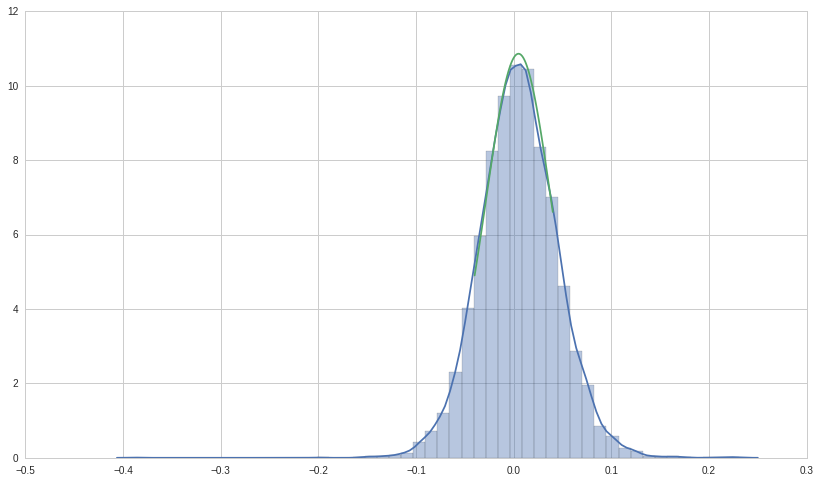

In [79]:
sns.distplot(return_array_10d)
x=np.linspace(-0.04,0.04,100)
plt.plot(x,sp.stats.t(df=df,scale=scale,loc=loc).pdf(x))
plt.show()

Based on both qq plot and the distribution plot, the student-t fits very well. In the next part, we use this fitted t distrunution to calculate the value at risk

#### Calculate the 10-day VaR using fitted student-t distribution

In [80]:
def VaR_t(confidence_level,df,loc,scale):
    VaR = sp.stats.t(df=df,loc=loc,scale=scale).ppf(1-confidence_level)
    return VaR

In [81]:
VaR_t(0.99,df=df,loc=loc,scale=scale)

-0.091863586064685782

#### Calculate the 5-day (one-week) VaR using fitted student-t distribution

In [82]:
return_array_5d = return_array_10d/2 # one-week return transformed from 10d returns

In [83]:
df2, loc2, scale2 = sp.stats.t.fit(return_array_5d)

In [84]:
VaR_t(0.99,df=df2,loc=loc2,scale=scale2)

-0.045931763693248473